## Experiment Results Notebook

Please use this notebook when you want to see the results obtained in one experiment (= 100 simulations). This should be used when you have transferred one experiment data form the UCL clusters to your computer.

The notebook creates a series of figures regarding the emerging journal, reviewers, and author strategies.

You are free to use this notebook to see the results of any experiment you wish.

The default results you can see in this notebook are for the co-evolution experiment (where agents and journals evolve).

### Imports

In [1]:
import os 
import openpyxl
from os import listdir
import pandas as pd
from os.path import isfile, join
import matplotlib.pyplot as plt
import numpy as np  
from scipy import stats  
from scipy.stats import norm
from matplotlib.ticker import PercentFormatter
from sklearn import preprocessing
from matplotlib import rc
rc('text', usetex=True)
import seaborn as sns
sns.set()
import matplotlib.ticker as mtick

### Intialisation of the variables we need

In [2]:
files_dictionary = {
  "/MEAN_ATTRIBUTES.csv": "df_mean_attributes",
  "/STD_ATTRIBUTES.csv": "df_std_attributes",
  "/PROPORTIONS.csv": "df_proportions",
  "/JIF.csv": "df_jif",
  "/JOURNAL_ACCEPTANCE.csv": "df_journal_acceptance" ,
  "/JOURNAL_MEAN_ATTRIBUTES.csv": "df_mean_attributes_journal",
  "/JOURNAL_STD_ATTRIBUTES.csv": "df_std_attributes_journal",
  "/REPUTATION.csv": "df_reputation",
}

In [3]:
df_dictionary = {}
for name in files_dictionary.values():
    df_dictionary[name] = pd.DataFrame()

### Importing our data

- root = path to the folder where the data from our simulation is
- root_save_results = path to the folder where you want the figures to be saved

In [4]:
# PLEASE CHANGE THE ROOT PATH 
root = '/path/to/experiment/folder/job'
root_save_results = '/path/to/your/desired/images/folder/'

In [5]:
subfolders = [ f.path for f in os.scandir(root) if f.is_dir() ]

In [6]:
index = 1
for folder in subfolders:
    for key, value in files_dictionary.items():
        df = pd.read_csv(folder+'/Results' + key)
        df_dictionary[value] = df_dictionary[value].append(df.tail(1), sort=True)

## DISTRIBUTION OF AGENT ATTRIBUTES

In [7]:
df_dictionary['df_mean_attributes'] = df_dictionary['df_mean_attributes'].reset_index(drop=True)
df_dictionary['df_mean_attributes'].head()

,manuscriptStrategy,pa,ph,propA,propQ,wArep,wAsd,wAtd,wQrep,wQsd,wQtd
0,0.999154,0.602351,0.767644,0.0,0.10,-0.449613,0.161151,0.209037,-0.010587,0.153552,0.523851
1,0.980419,0.637531,0.419973,1.0,0.00,-0.639456,0.154015,0.174867,0.198329,0.292618,-0.300524
2,0.993874,0.345308,0.366785,0.0,0.00,-0.832599,0.389849,0.749329,-0.315545,0.738876,-0.324427
3,0.991154,0.466614,0.752319,0.0,0.12,0.433928,0.285125,0.801752,-0.050019,0.248077,-0.142902
4,0.991154,0.980556,0.375017,1.0,0.50,0.715130,0.312008,0.050923,0.710544,0.404337,-0.107063


### HISTOGRAM OF MANUSCRIPT STRATEGY

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
 <a list of 9 Text yticklabel objects>)

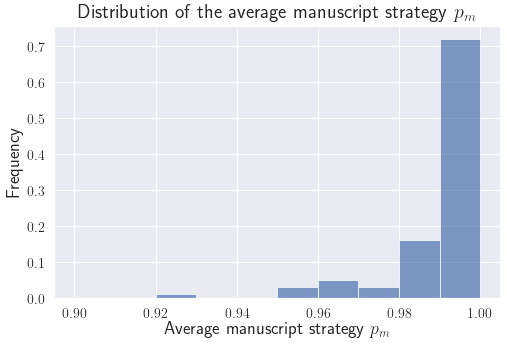

In [8]:
bins = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,1]

min_val = round(df_dictionary['df_mean_attributes']['manuscriptStrategy'].min(),1)
max_val = round(df_dictionary['df_mean_attributes']['manuscriptStrategy'].max(),1)

weights_manuscript=np.ones(len(df_dictionary['df_mean_attributes']['manuscriptStrategy'])) / len(
    df_dictionary['df_mean_attributes']['manuscriptStrategy'])

plt.figure(figsize=(8,5))
counts, bins, _  = plt.hist(df_dictionary['df_mean_attributes']['manuscriptStrategy'], 
                            weights = weights_manuscript, bins=bins, alpha =0.7)
plt.title('Distribution of the average manuscript strategy $p_m$', fontsize=20)

plt.xlabel('Average manuscript strategy $p_m$', fontsize=18)
plt.xticks(fontsize=14)

plt.ylabel('Frequency', fontsize=18)
plt.yticks(fontsize=14)
# plt.savefig(root_save_results + 'manuscript.png', dpi=300)

### HISTOGRAM FOR $Prop_{Q}$ AND $Prop_{A}$ 

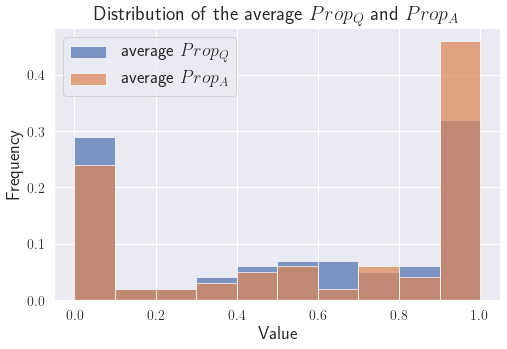

In [9]:
prop_bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1]

weights_propQ=np.ones(len(df_dictionary['df_mean_attributes']['propQ'])) / len(df_dictionary['df_mean_attributes']['propQ'])
weights_propA=np.ones(len(df_dictionary['df_mean_attributes']['propA'])) / len(df_dictionary['df_mean_attributes']['propA'])

plt.figure(figsize=(8,5))

plt.hist(df_dictionary['df_mean_attributes']['propQ'], bins=prop_bins, 
         label = 'average $Prop_Q$', alpha =0.7, weights=weights_propQ)
plt.hist(df_dictionary['df_mean_attributes']['propA'], bins=prop_bins, 
         label = 'average $Prop_A$', alpha =0.7, weights=weights_propA)


plt.xlabel('Value', fontsize=18)
plt.xticks(fontsize=14)

plt.ylabel('Frequency', fontsize=18)
plt.yticks(fontsize=14)

plt.title('Distribution of the average $Prop_Q$ and $Prop_A$', fontsize=20)
plt.legend(loc='upper left',  prop={'size': 18})
# plt.savefig(root_save_results + 'props.png', dpi=300)

### HISTOGRAM FOR $p_{h}$ AND $p_{a}$ 

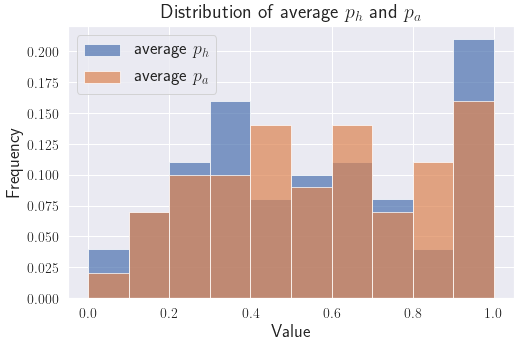

In [10]:
prop_bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1]

weights_ph=np.ones(len(df_dictionary['df_mean_attributes']['ph'])) / len(df_dictionary['df_mean_attributes']['ph'])
weights_pa=np.ones(len(df_dictionary['df_mean_attributes']['pa'])) / len(df_dictionary['df_mean_attributes']['pa'])

plt.figure(figsize=(8,5))
plt.title('Distribution of average $p_h$ and $p_a$', fontsize=20)
plt.hist(df_dictionary['df_mean_attributes']['ph'], bins=prop_bins, 
         label = 'average $p_h$', alpha =0.7, weights = weights_ph)
plt.hist(df_dictionary['df_mean_attributes']['pa'], bins=prop_bins, 
         label = 'average $p_a$', alpha =0.7, weights = weights_pa)

plt.xlabel('Value', fontsize=18)
plt.xticks(fontsize=14)

plt.ylabel('Frequency', fontsize=18)
plt.yticks(fontsize=14)
plt.legend(loc='upper left',  prop={'size': 18})
# plt.savefig(root_save_results + 'phpa.png', dpi=300)

### HISTOGRAM OF CONDITIONAL WEIGHTS

### Histogram for $w_Q^{sd}$, $w_Q^{td}$, $w_Q^{Rep}$

Text(0, 0.5, 'Frequency')

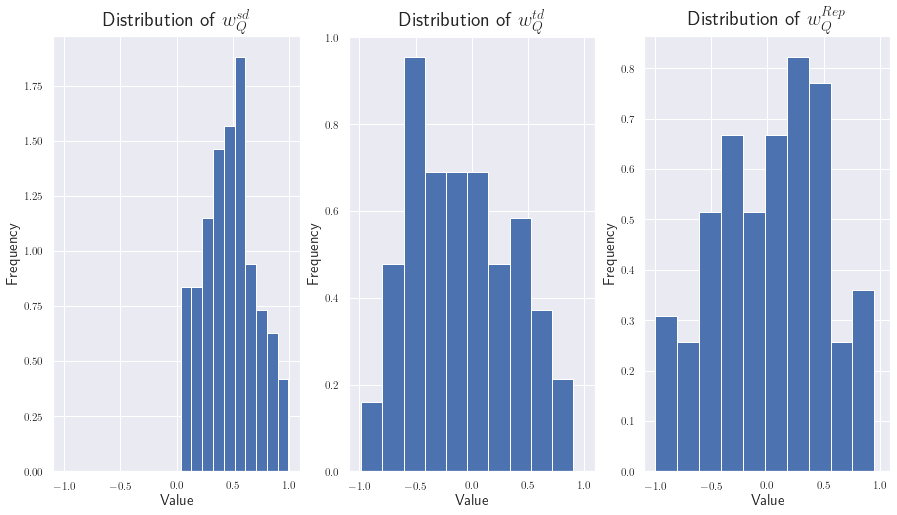

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, figsize = (15, 8))
axs[0].hist(df_dictionary['df_mean_attributes']['wQsd'], density=True)
axs[1].hist(df_dictionary['df_mean_attributes']['wQtd'], density=True)
axs[2].hist(df_dictionary['df_mean_attributes']['wQrep'], density=True)

axs[0].title.set_text('$w_Q^{sd}$')
axs[1].title.set_text('$w_Q^{td}$')
axs[2].title.set_text('$w_Q^{Rep}$')

axs[0].title.set_text('Distribution of $w_Q^{sd}$')
axs[1].title.set_text('Distribution of $w_Q^{td}$')
axs[2].title.set_text('Distribution of $w_Q^{Rep}$')

axs[0].title.set_size(20)
axs[1].title.set_size(20)
axs[2].title.set_size(20)

axs[0].set_xlabel('Value', fontsize = 15)
axs[0].set_ylabel('Frequency', fontsize = 15)

axs[1].set_xlabel('Value', fontsize = 15)
axs[1].set_ylabel('Frequency', fontsize = 15)

axs[2].set_xlabel('Value', fontsize = 15)
axs[2].set_ylabel('Frequency', fontsize = 15)

### Histogram for $w_A^{sd}$, $w_A^{td}$, $w_A^{Rep}$

Text(0, 0.5, 'Frequency')

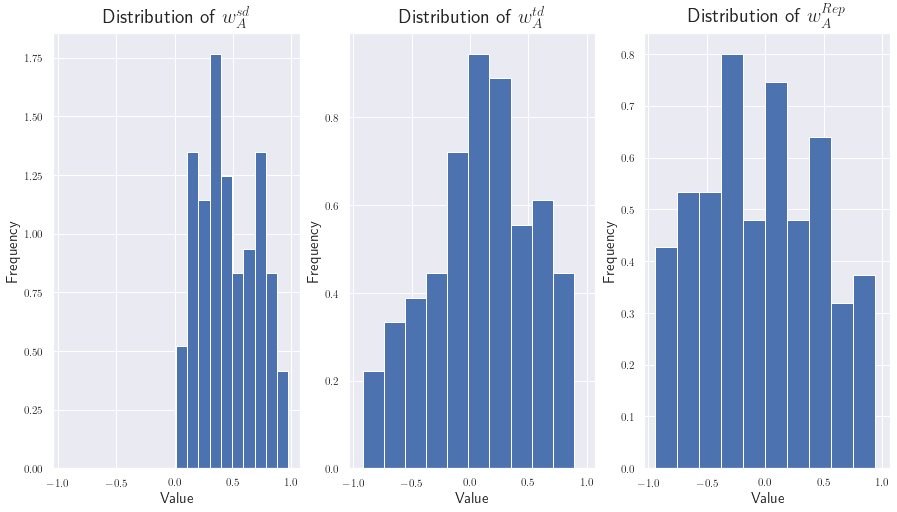

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, figsize = (15, 8))
axs[0].hist(df_dictionary['df_mean_attributes']['wAsd'], density=True)
axs[1].hist(df_dictionary['df_mean_attributes']['wAtd'], density=True)
axs[2].hist(df_dictionary['df_mean_attributes']['wArep'], density=True)

axs[0].title.set_text('Distribution of $w_A^{sd}$')
axs[1].title.set_text('Distribution of $w_A^{td}$')
axs[2].title.set_text('Distribution of $w_A^{Rep}$')

axs[0].title.set_size(20)
axs[1].title.set_size(20)
axs[2].title.set_size(20)

axs[0].set_xlabel('Value', fontsize = 15)
axs[0].set_ylabel('Frequency', fontsize = 15)

axs[1].set_xlabel('Value', fontsize = 15)
axs[1].set_ylabel('Frequency', fontsize = 15)

axs[2].set_xlabel('Value', fontsize = 15)
axs[2].set_ylabel('Frequency', fontsize = 15)

## DISTRIBUTION OF JOURNALS' PROPORTIONS

Text(0.5, 1.0, 'Distribution of the final proportions of good papers or good reviews')

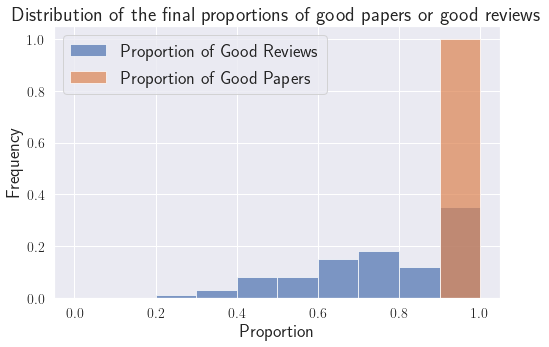

In [13]:
my_bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

weights_reviews=np.ones(len(df_dictionary['df_proportions']['Proportion Reviews'])) / (len(df_dictionary['df_proportions']['Proportion Reviews']))
weights_papers=np.ones(len(df_dictionary['df_proportions']['Proportion Papers'])) / (len(df_dictionary['df_proportions']['Proportion Papers']))

plt.figure(figsize=(8,5))

plt.hist(df_dictionary['df_proportions']['Proportion Reviews'], 
         bins=my_bins, label = 'Proportion of Good Reviews', alpha =0.7, weights = weights_reviews)
plt.hist(df_dictionary['df_proportions']['Proportion Papers'], 
         bins=my_bins, label = 'Proportion of Good Papers', alpha =0.7, weights = weights_papers)

plt.xlabel('Proportion', fontsize=18)
plt.xticks(fontsize=14)

plt.ylabel('Frequency', fontsize=18)
plt.yticks(fontsize=14)

plt.legend(loc='upper left',  prop={'size': 18})
plt.title('Distribution of the final proportions of good papers or good reviews', fontsize=20)
# plt.savefig(root_save_results+ 'proportions2.png', dpi=300)

## DISTRIBUTION OF JOURNALS' JIFs

Text(0.5, 1.0, 'Distribution of final JIF`s for journals 0 to 3')

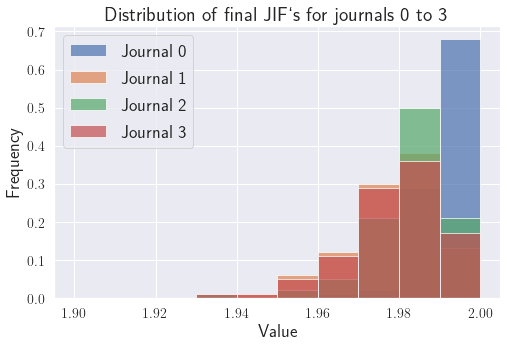

In [14]:
bins_jif = [1.9, 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2]

weights_jif_0=np.ones(len(df_dictionary['df_jif']['0'])) / len(df_dictionary['df_jif']['0'])
weights_jif_1=np.ones(len(df_dictionary['df_jif']['1'])) / len(df_dictionary['df_jif']['1'])
weights_jif_2=np.ones(len(df_dictionary['df_jif']['2'])) / len(df_dictionary['df_jif']['2'])
weights_jif_3=np.ones(len(df_dictionary['df_jif']['3'])) / len(df_dictionary['df_jif']['3'])

plt.figure(figsize=(8,5))

plt.hist(df_dictionary['df_jif']['0'], bins=bins_jif, label = 'Journal 0', alpha =0.7, weights = weights_jif_0)
plt.hist(df_dictionary['df_jif']['1'], bins=bins_jif, label = 'Journal 1', alpha =0.7, weights = weights_jif_1)
plt.hist(df_dictionary['df_jif']['2'], bins=bins_jif, label = 'Journal 2', alpha =0.7, weights = weights_jif_2)
plt.hist(df_dictionary['df_jif']['3'], bins=bins_jif, label = 'Journal 3', alpha =0.7, weights = weights_jif_3)

plt.xlabel('Value', fontsize=18)
plt.xticks(fontsize=14)

plt.ylabel('Frequency', fontsize=18)
plt.yticks(fontsize=14)

plt.legend(loc='upper left',  prop={'size': 18})
plt.title('Distribution of final JIF`s for journals 0 to 3', fontsize=20)
# plt.savefig(root_save_results + 'jif1.png', dpi=300)

## DISTRIBUTION OF JOURNALS' ACCEPTANCE RATES

Text(0.5, 1.0, 'Distribution of journal 0`s final aceptance rate')

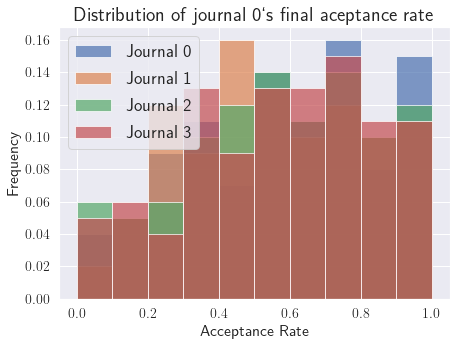

In [15]:
acc_bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1]

weights_acc_0=np.ones(len(df_dictionary['df_journal_acceptance']['0'])) / len(df_dictionary['df_journal_acceptance']['0'])
weights_acc_1=np.ones(len(df_dictionary['df_journal_acceptance']['1'])) / len(df_dictionary['df_journal_acceptance']['1'])
weights_acc_2=np.ones(len(df_dictionary['df_journal_acceptance']['2'])) / len(df_dictionary['df_journal_acceptance']['2'])
weights_acc_3=np.ones(len(df_dictionary['df_journal_acceptance']['3'])) / len(df_dictionary['df_journal_acceptance']['3'])

plt.figure(figsize=(7,5))

plt.hist(df_dictionary['df_journal_acceptance']['0'], alpha =0.7, bins=acc_bins,
         weights = weights_acc_0, label = 'Journal 0')
plt.hist(df_dictionary['df_journal_acceptance']['1'], alpha =0.7, bins=acc_bins,
         weights = weights_acc_1, label = 'Journal 1')
plt.hist(df_dictionary['df_journal_acceptance']['2'], alpha =0.7, bins=acc_bins,
         weights = weights_acc_2, label = 'Journal 2')
plt.hist(df_dictionary['df_journal_acceptance']['3'], alpha =0.7, bins=acc_bins,
         weights = weights_acc_3, label = 'Journal 3')


plt.xlabel('Acceptance Rate', fontsize=16)
plt.xticks(fontsize=14)

plt.ylabel('Frequency', fontsize=16)
plt.yticks(fontsize=14)

plt.legend(loc='upper left',  prop={'size': 18})
plt.title('Distribution of journal 0`s final aceptance rate', fontsize=20)
# plt.savefig(root_save_results + 'acceptance.png', dpi=300)

## DISTRIBUTION OF JOURNALS ATTRIBUTES

Relevant figures when journals are allowed to evolve.

In [16]:
df_dictionary['df_mean_attributes_journal'] = df_dictionary['df_mean_attributes_journal'].reset_index(drop=True)
df_dictionary['df_mean_attributes_journal'].head()

,allowableSocialDist,allowableTopicDist,disagreementStrategy,maxPapers
0,20.0,0.515783,4.0,11.0
1,2.0,0.515783,4.0,15.0
2,2.0,0.921692,4.0,7.0
3,24.0,0.921692,4.0,11.0
4,2.0,0.313230,4.0,15.0


### Distribution of journals' disagreement strategies

Text(0.5, 1.0, 'Distribution of journals` disagreement strategy')

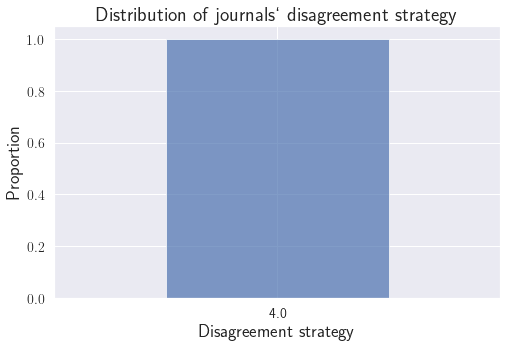

In [17]:
plt.figure(figsize=(8,5))

ax = (df_dictionary['df_mean_attributes_journal']['disagreementStrategy'].value_counts()/100).plot(kind='bar', alpha=0.7)

plt.xlabel('Disagreement strategy',  fontsize=18)
plt.xticks(fontsize=14, rotation='horizontal')

plt.ylabel('Proportion',  fontsize=18) 
plt.yticks(fontsize=14)

plt.title('Distribution of journals` disagreement strategy',  fontsize=20)
# plt.savefig(root_save_results + 'disagreement.png', dpi=300)

### Distribution of journals' maximum number of allowable papers to publish

Text(0.5, 1.0, 'Distribution of journals` maximum number \n of allowable papers to publish')

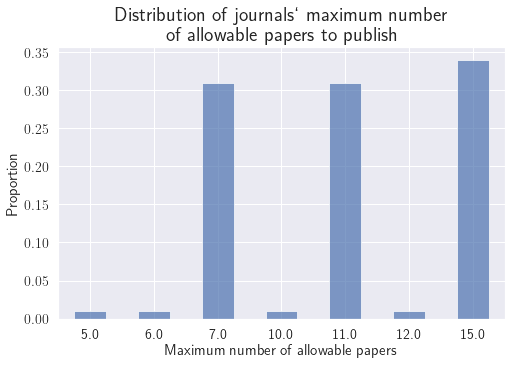

In [18]:
plt.figure(figsize=(8,5))

ax = (df_dictionary['df_mean_attributes_journal']['maxPapers'].value_counts()/100).sort_index(ascending=True).plot(kind = 'bar', alpha=0.7)

plt.xlabel('Maximum number of allowable papers', fontsize=15)
plt.xticks(fontsize=14, rotation='horizontal')

plt.ylabel('Proportion', fontsize=15)
plt.yticks(fontsize=14)

plt.title('Distribution of journals` maximum number \n of allowable papers to publish', fontsize=20)
# plt.savefig(root_save_results  + 'maxPaper.png', dpi=300)

### Distribution of journals' maximum allowable topic distance

Text(0.5, 1.0, 'Distribution of journals` maximum allowable topic distance')

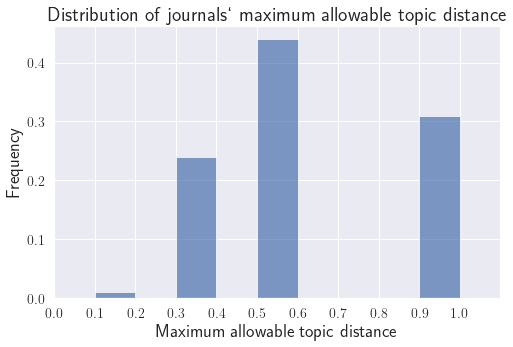

In [19]:
bins_topic = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1]

weights_journal_topic=np.ones(len(df_dictionary['df_mean_attributes_journal']['allowableTopicDist'])) / len(df_dictionary['df_mean_attributes_journal']['allowableTopicDist'])

plt.figure(figsize=(8,5))

plt.hist(df_dictionary['df_mean_attributes_journal']['allowableTopicDist'], alpha =0.7,bins=bins_topic,  weights = weights_journal_topic)

plt.xlabel('Maximum allowable topic distance', fontsize=18)
plt.xticks(np.linspace(0,1,11))
plt.xlim(0,1.1)
plt.xticks(fontsize=14)

plt.ylabel('Frequency', fontsize=18)
plt.yticks(fontsize=14)

plt.title('Distribution of journals` maximum allowable topic distance', fontsize=20)
# plt.savefig(root_save_results + 'topicdist.png', dpi=300)


### Distribution of journals' minimum allowable social distance

Text(0.5, 1.0, 'Distribution of journals` minimum allowable social distance')

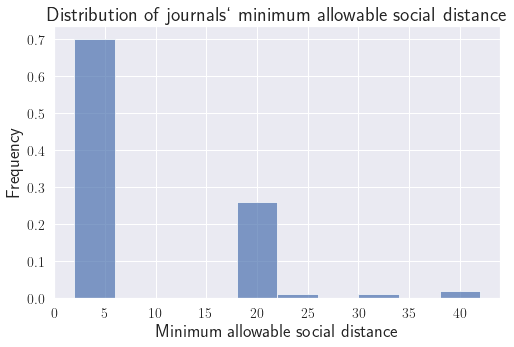

In [20]:
weights_journal_social=np.ones(len(df_dictionary['df_mean_attributes_journal']['allowableSocialDist'])) / len(df_dictionary['df_mean_attributes_journal']['allowableSocialDist'])

plt.figure(figsize=(8,5))

plt.hist(df_dictionary['df_mean_attributes_journal']['allowableSocialDist'], alpha =0.7, weights = weights_journal_social)

plt.xlabel('Minimum allowable social distance', fontsize=18)
plt.xticks(fontsize=14, rotation='horizontal')

plt.ylabel('Frequency', fontsize=18)
plt.yticks(fontsize=14)

plt.title('Distribution of journals` minimum allowable social distance', fontsize=20)
# plt.savefig(root_save_results + 'socialdist.png', dpi=300)

## 3D Plot of unique combinations of journals' strategies

This kind of plot is used for the co-evolution experiment.

In [21]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

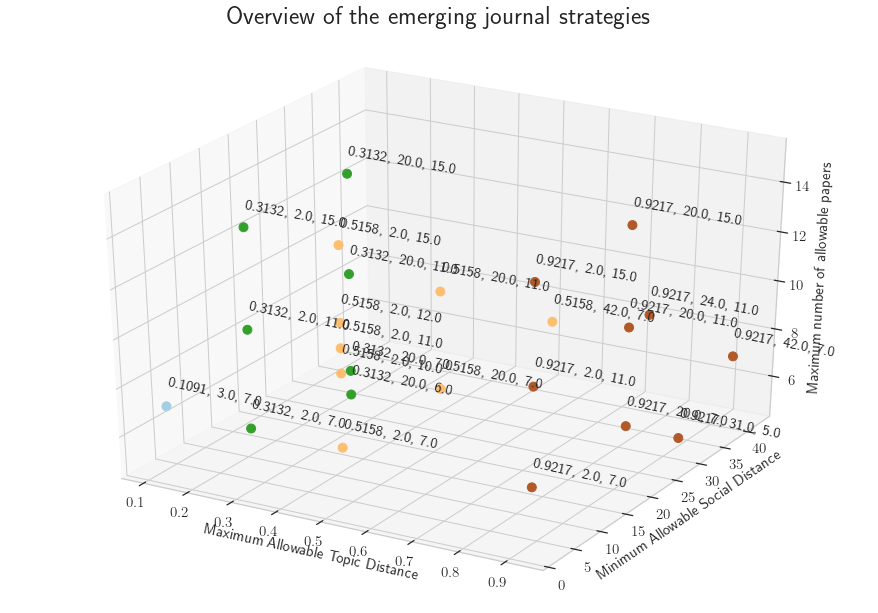

In [22]:
df_dictionary['df_mean_attributes_journal'] = df_dictionary['df_mean_attributes_journal'].drop_duplicates()
import seaborn as sns, numpy as np, pandas as pd, random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(12,8))

ax = Axes3D(fig)

x = df_dictionary['df_mean_attributes_journal']['allowableTopicDist']
y = df_dictionary['df_mean_attributes_journal']['allowableSocialDist']
z = df_dictionary['df_mean_attributes_journal']['maxPapers']

for a, b, c in zip(x, y, z):
    text = str(round(a,4)) + ', ' + str(b) + ', ' + str(c)
    ax.text(a, b, c, text, zdir=(1, 1, 1), fontsize=15)

g = ax.scatter(x, y, z, c=x, marker='o', depthshade=False, cmap='Paired', s=80)
ax.set_xlabel('Maximum Allowable Topic Distance')
ax.set_ylabel('Minimum Allowable Social Distance')
ax.set_zlabel('Maximum number of allowable papers')

ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.zaxis.label.set_size(15)

ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="z", labelsize=15)

ax.title.set_text('Overview of the emerging journal strategies')
ax.title.set_size(25)


# plt.savefig(root_save_results + 'journal_strat.png', dpi=300)
plt.show()